In [1]:
%load_ext autoreload
%cd ..

/Users/tomhanlon58/Desktop/NoisyGAN


In [30]:
%autoreload 2
%reload_ext autoreload
%pwd
from core import *
import gin
gin.enter_interactive_mode()

In [4]:
import tensorflow as tf

In [10]:
tf.range(-0.5, 0.5, delta=(1/1000), dtype='float32').numpy().shape

(1000,)

In [12]:
from keras.models import *
from keras.layers import *

cppn = Sequential()
cppn.add(Dense(100, input_dim=1, dtype='float32', activation='relu'))

# Add ddense layers
for i in range(2):
    cppn.add(Dense(100, activation='relu'))

cppn.add(Dense(1, activation='sigmoid'))

In [34]:
input = Input(shape=(1,None,1))
x = Dense(10)(input)
x = Dense(10)(x)
out = Dense(1)(x)

cppn = Model(input = input, output = out)

/Users/tomhanlon58/anaconda3/envs/ddsp_env/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [36]:
cppn = Sequential()
cppn.add(Dense(10, input_dim=1, dtype='float32'))
cppn.add(Dense(10, dtype='float32'))
cppn.add(Dense(10, dtype='float32'))
cppn.add(Dense(1, dtype='float32', activation='sigmoid'))

In [37]:
cppn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_26 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_27 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 11        
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [19]:
test_tensor = tf.convert_to_tensor(test_arr)
cppn(test_tensor)

TypeError: Input 'b' of 'MatMul' Op has type float32 that does not match type float64 of argument 'a'.

In [66]:
test_tensor = tf.convert_to_tensor(np.ones((8,1000,1)))
test = tf.split(test_tensor, [1,1,6], axis = 0)
print(test[0].numpy().shape)
print(test[1].numpy().shape)
print(test[2].numpy().shape)

t1, t2, t3 = tf.split(test_tensor, [1,1,6], axis = 0)
print(t1.numpy().shape)
print(t2.numpy().shape)
print(t3.numpy().shape)

(1, 1000, 1)
(1, 1000, 1)
(6, 1000, 1)
(1, 1000, 1)
(1, 1000, 1)
(6, 1000, 1)


In [79]:
test_tensor = tf.convert_to_tensor(np.ones((1,1000,1)), dtype='float32')
test2_tensor = tf.reshape(tf.range(0,1000,1, dtype='float32'), (1,1000,1))

out = tf.math.add(test_tensor, test2_tensor)
div = out/2

In [78]:
out.numpy().shape

(1, 1000, 1)

In [37]:
from keras.layers import *
from keras.models import *

input = Input(shape=(1000,), dtype='float32')
x = Dense(10, name = "f0_cppn_input")(input)

for i in range(2-1):
    x = Dense(10, name = "f0_cppn_dense_%04d" % i)(x)

out = Dense(1000, activation='sigmoid', name = "f0_cppn_output")(x)

cppn = Model(input, out)

In [21]:
cppn.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 1000)              0         
_________________________________________________________________
f0_cppn_input (Dense)        (None, 10)                10010     
_________________________________________________________________
f0_cppn_dense_0000 (Dense)   (None, 10)                110       
_________________________________________________________________
f0_cppn_output (Dense)       (None, 1000)              11000     
Total params: 21,120
Trainable params: 21,120
Non-trainable params: 0
_________________________________________________________________


In [157]:
#test_tensor = tf.convert_to_tensor(np.ones((1,1000)), dtype='float32')
test_tensor = tf.reshape(tf.range(-0.5, 0.5, delta=(1/1000), dtype='float32'), (1,1000))
print(test_tensor.numpy().shape)

cppn(test_tensor)
x = np.arange(0,1000)
x = x.reshape((1,1000))
x.shape

(1, 1000)


(1, 1000)

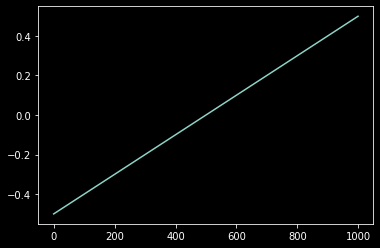

In [120]:
import matplotlib.pyplot as plt
plt.plot(test_tensor.numpy().T)
plt.show()

In [185]:
cppn = Sequential()
cppn.add(Dense(1000, input_dim=1000, activation='tanh', kernel_initializer='identity'))#, bias_initializer='zeros'))
#cppn.add(Dense(1000, activation='tanh', kernel_initializer='random_uniform', bias_initializer='zeros'))
cppn.build()
cppn.summary()

x = np.arange(0,1000)/1000 - 0.5
x = x.reshape((1,1000))

#cppn.compile(optimizer='adam', loss='mean_squared_error')
#cppn.fit(x, x, epochs=100)

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 1000)              1001000   
Total params: 1,001,000
Trainable params: 1,001,000
Non-trainable params: 0
_________________________________________________________________


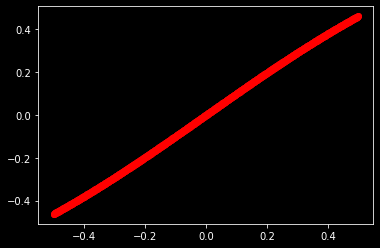

In [186]:
pred = cppn.predict(test_tensor.numpy())
plt.plot(test_tensor, pred, 'ro')
plt.show()

In [196]:
from keras.layers import LSTM
rec_cppn = Sequential()
rec_cppn.add(LSTM(10, input_shape = (1000,1)))
rec_cppn.add(Dense(100))
rec_cppn.add(Dense(100))

rec_cppn.build()
rec_cppn.summary()

Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_116 (Dense)            (None, 100)               1100      
_________________________________________________________________
dense_117 (Dense)            (None, 100)               10100     
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________


In [269]:

from keras.layers import *

'''
# Testing f0_upsampler
start = Input(shape=(10,1,), dtype='float32')
x = Conv1D(1, 3, padding = 'same', dilation_rate=1, kernel_initializer='ones')(start)
y = Conv1D(1, 3, padding = 'same', dilation_rate=2, kernel_initializer='ones')(start)
z = Conv1D(1, 3, padding = 'same', dilation_rate=3, kernel_initializer='ones')(start)

c = Concatenate()([x,y,z])

model = Model(input = start, output = c)
#model.build()
model.summary()
'''
# Latent Vector of dim = 10
start = Input(shape = (10,1,), dtype='float32')

# One layer of convolutions
x = Conv1D(10, 3, padding = 'same', dilation_rate=1, kernel_initializer='ones')(start)
y = Conv1D(10, 3, padding = 'same', dilation_rate=2, kernel_initializer='ones')(start)
z = Conv1D(10, 3, padding = 'same', dilation_rate=4, kernel_initializer='ones')(start)

c = Concatenate()([x,y,z])

# Upsample
up = UpSampling1D(5)(c)

x = Conv1D(10, 3, padding = 'same', dilation_rate=1, kernel_initializer='ones')(up)
y = Conv1D(10, 3, padding = 'same', dilation_rate=2, kernel_initializer='ones')(up)
z = Conv1D(10, 3, padding = 'same', dilation_rate=4, kernel_initializer='ones')(up)

c = Concatenate()([x,y,z])

# Upsample
up = UpSampling1D(5)(c)

x = Conv1D(10, 3, padding = 'same', dilation_rate=1, kernel_initializer='ones')(up)
y = Conv1D(10, 3, padding = 'same', dilation_rate=4, kernel_initializer='ones')(up)
z = Conv1D(10, 3, padding = 'same', dilation_rate=8, kernel_initializer='ones')(up)

c = Concatenate()([x,y,z])

# Upsample
up = UpSampling1D(2)(c)

x = Conv1D(10, 3, padding = 'same', dilation_rate=1, kernel_initializer='ones')(up)
y = Conv1D(10, 3, padding = 'same', dilation_rate=4, kernel_initializer='ones')(up)
z = Conv1D(10, 3, padding = 'same', dilation_rate=8, kernel_initializer='ones')(up)

c = Concatenate()([x,y,z])

# Upsample
up = UpSampling1D(2)(c)

x = Conv1D(10, 3, padding = 'same', dilation_rate=1, kernel_initializer='ones')(up)
y = Conv1D(10, 3, padding = 'same', dilation_rate=4, kernel_initializer='ones')(up)
z = Conv1D(10, 3, padding = 'same', dilation_rate=8, kernel_initializer='ones')(up)

c = Concatenate()([x,y,z])





model = Model(input = start, output = up)
#model.build()
model.summary()

Model: "model_49"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_62 (InputLayer)           (None, 10, 1)        0                                            
__________________________________________________________________________________________________
conv1d_271 (Conv1D)             (None, 10, 10)       40          input_62[0][0]                   
__________________________________________________________________________________________________
conv1d_272 (Conv1D)             (None, 10, 10)       40          input_62[0][0]                   
__________________________________________________________________________________________________
conv1d_273 (Conv1D)             (None, 10, 10)       40          input_62[0][0]                   
___________________________________________________________________________________________

/Users/tomhanlon58/anaconda3/envs/ddsp_env/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("up...)`


In [246]:
arr = np.arange(0,10).reshape(1,10,1)
print(arr.shape)
print(arr)
out = model.predict(arr)
out

(1, 10, 1)
[[[0]
  [1]
  [2]
  [3]
  [4]
  [5]
  [6]
  [7]
  [8]
  [9]]]


array([[[ 1.,  2.,  3.],
        [ 3.,  4.,  5.],
        [ 6.,  6.,  7.],
        [ 9.,  9.,  9.],
        [12., 12., 12.],
        [15., 15., 15.],
        [18., 18., 18.],
        [21., 21., 11.],
        [24., 14., 13.],
        [17., 16., 15.]]], dtype=float32)